# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang saya gunakan merupakan dataset public dari huggingface. dimana datasetnya berisikan beberapa tweet sarcasm

Terdapat 2 kolom yaitu Tweet, dan label (Sarcasm Yes/No)

Link dataset : <link>https://huggingface.co/datasets/nikesh66/Sarcasm-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
#Type your code here
import emoji
import torch
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from automated_mufli import data_preprocessing


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
#Type your code here
df = pd.read_csv('sarcasm.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#Type your code here
df.head()

,Unnamed: 0,Tweet,Sarcasm (yes/no)
0,0,I genuinely love musicians.,no
1,1,I find vegetarians to be wonderful.,no
2,2,Because artists really make everything better.,yes
3,3,Can't wait for more of the game.,yes
4,4,"Oh great, another artists. Just what I needed.",yes


In [6]:
df.describe()

,Unnamed: 0
count,5000.000000
mean,2499.500000
std,1443.520003
min,0.000000
25%,1249.750000
50%,2499.500000
75%,3749.250000
max,4999.000000


# Word clouds

In [7]:
text = ' '.join(df['Tweet'].astype(str).tolist())
text = re.sub(r'[^A-Za-z\s]', '', text)
text = text.lower()
stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)

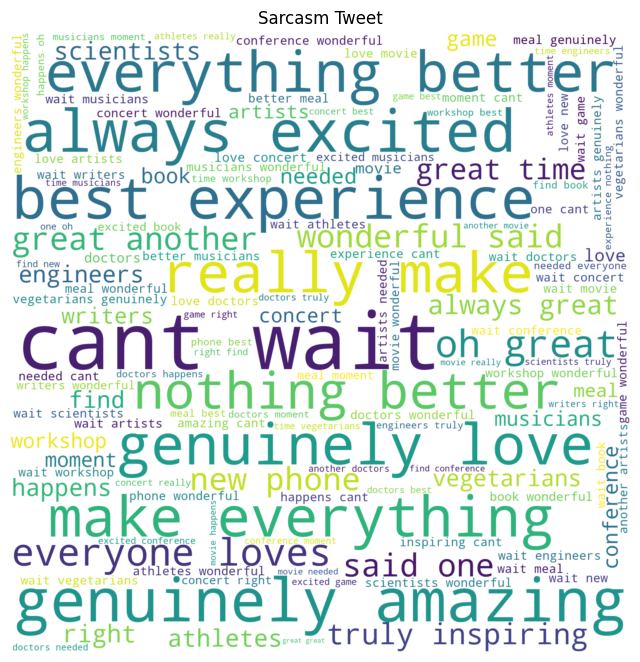

In [8]:
wordcloud = WordCloud(width=1600, height=1600, background_color='white').generate(text)
plt.figure(figsize=(8,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sarcasm Tweet')
plt.show()

# Most appear words

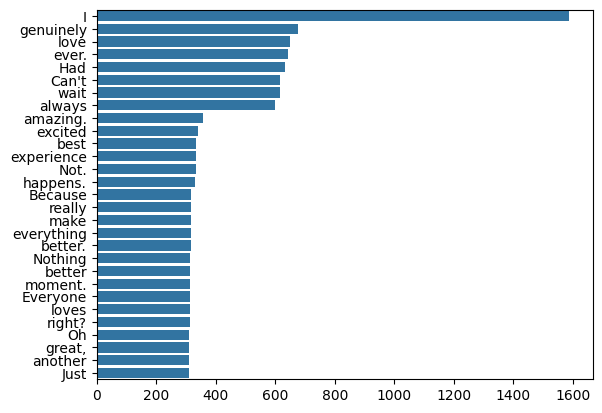

In [9]:
def plot_top_non_stopwords_barchart(text):
    stop=set(STOPWORDS)
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['Tweet'])

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
X_train, X_test, y_train, y_test, df_fix = data_preprocessing(
    df_path='sarcasm.csv', 
    target_cols='Sarcasm (yes/no)', 
    save_path='tweet_sarcasm_done.joblib', 
    test_size=0.2
)


In [11]:
df_fix.to_csv('sarcasm_clean.csv')

# saya sudah berhasil membuat CI CD dengan menggunakan github

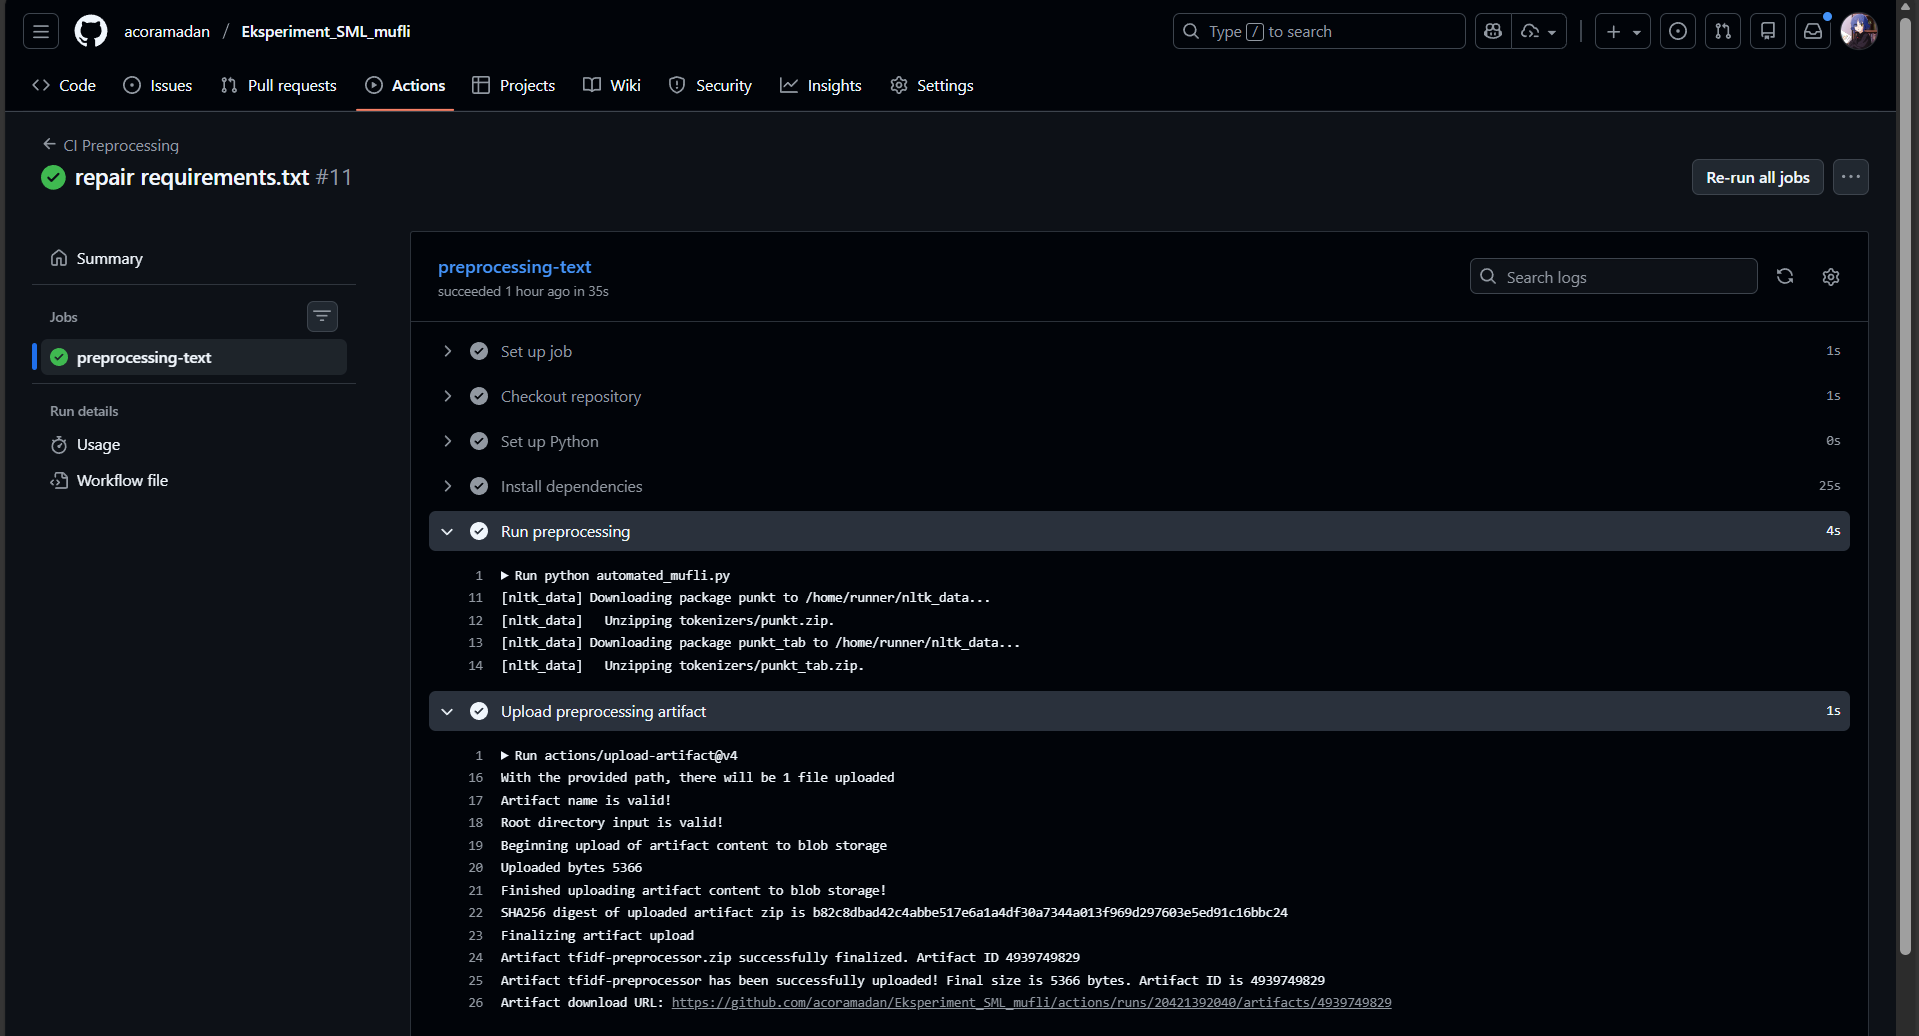